In [26]:
import os
import glob
import shutil
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Visualize the training process

In [27]:
metrics = pickle.load(open("results.pkl", "rb"))
print(len(metrics))

100


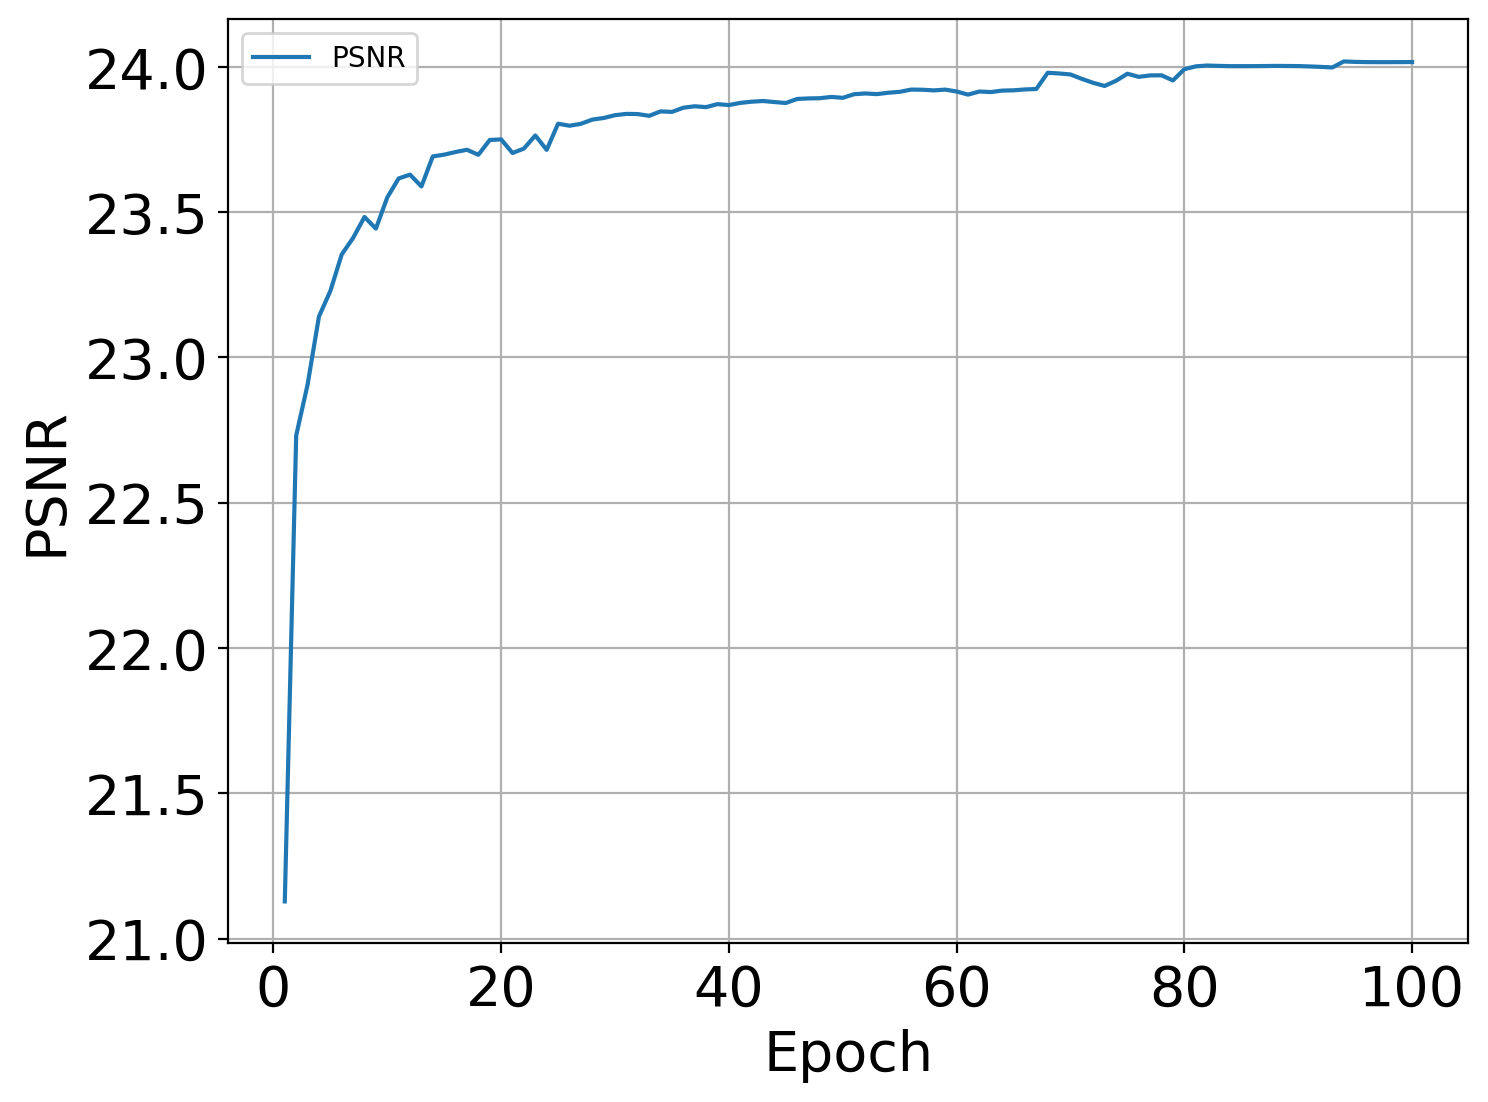

In [33]:
# learning rate
X, Y1, Y2, Y3, Y4, Y5 = [], [], [], [], [], []
for  item in metrics:
    epoch, learning_rate,  train_psnr, train_ssim, test_psnr, test_ssim = item
    X.append(epoch)
    Y1.append(learning_rate)
    Y2.append(-train_psnr)
    Y3.append(train_ssim)
    Y4.append(test_psnr)
    Y5.append(test_ssim)


#figure parameters
size = 20

#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.plot(X, Y4, label="PSNR")
# ax.plot(X, Y5, label="SSIM")
# ax.plot(X, Y2, label="Loss")
# ax.plot(X, Y2, label="train")
# ax.plot(X, Y3, label="test")

# ax.set_title("Comparing the tautomerization Gibbs free energies")
ax.set_ylabel(r"PSNR", fontsize=size)  #support latex representation
ax.set_xlabel(r"Epoch", fontsize=size)
plt.xticks(fontsize=size)  #visible x ticks
plt.yticks(fontsize=size)
ax.grid()
ax.legend()
fig.savefig("test_PSNR.png")

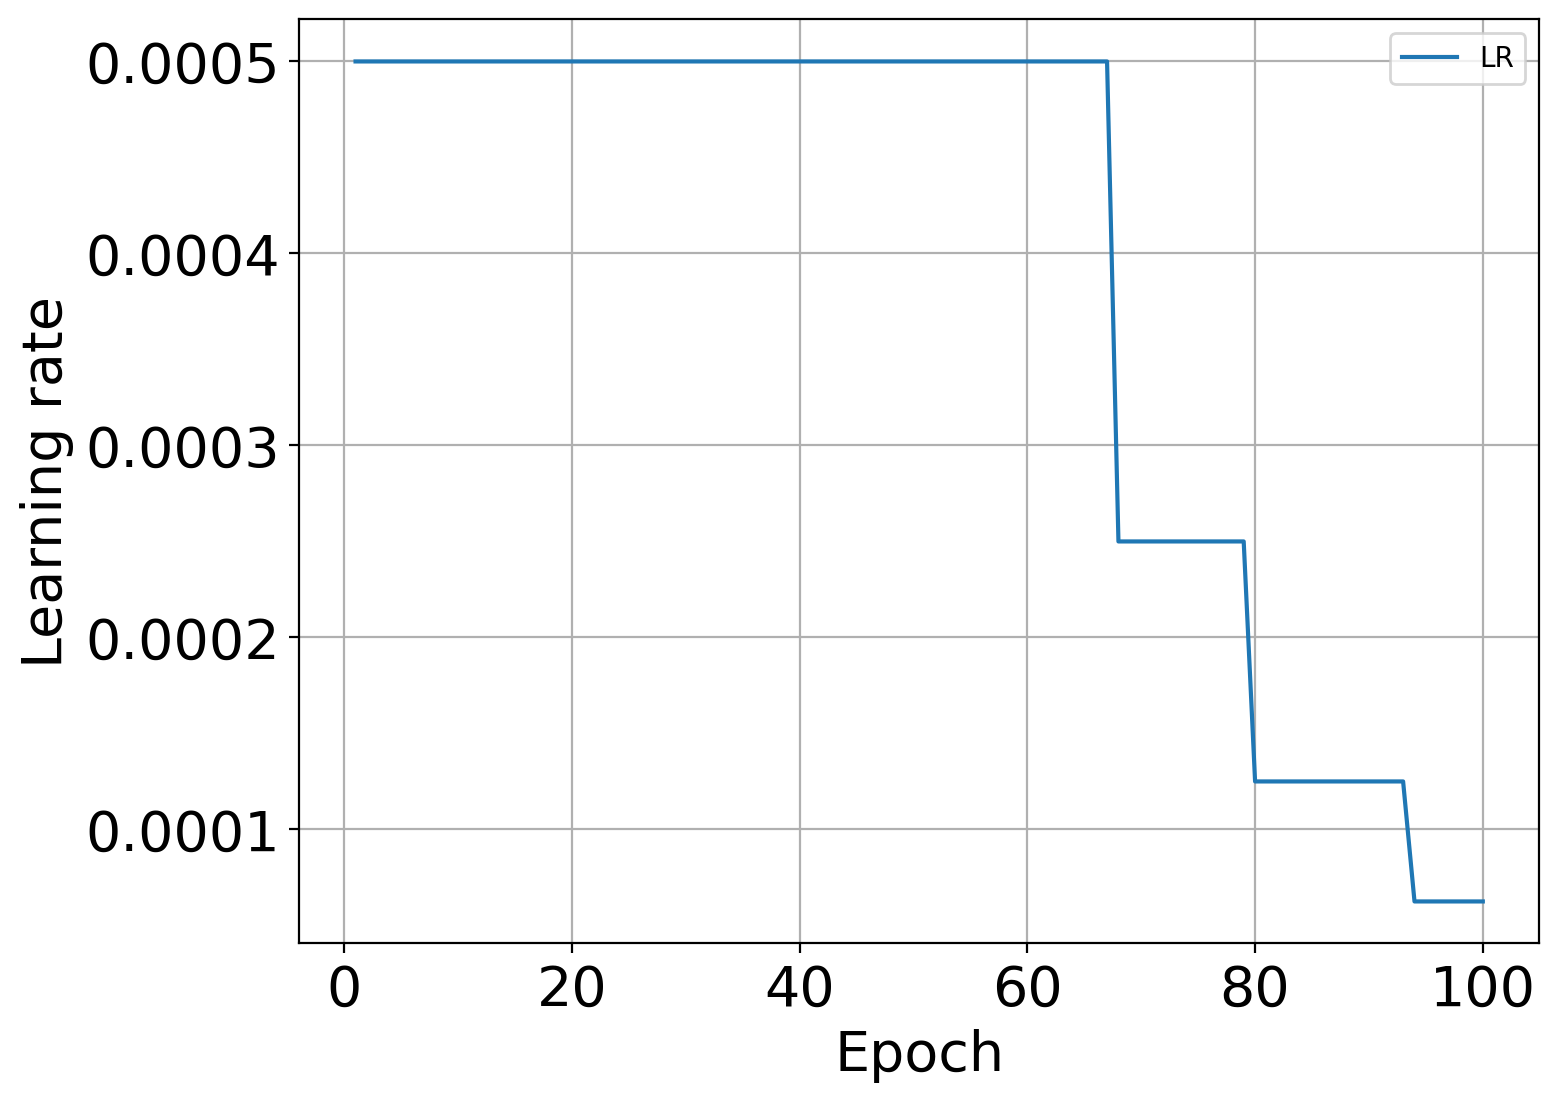

In [34]:
#figure parameters
size = 20

#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.plot(X, Y1, label="LR")
# ax.plot(X, Y2, label="train")
# ax.plot(X, Y3, label="test")

# ax.set_title("Comparing the tautomerization Gibbs free energies")
ax.set_ylabel(r"Learning rate", fontsize=size)  #support latex representation
ax.set_xlabel(r"Epoch", fontsize=size)
plt.xticks(fontsize=size)  #visible x ticks
plt.yticks(fontsize=size)
ax.grid()
ax.legend()
fig.savefig("LR.png")

# Visualize the model

In [35]:
from model import Conv

In [36]:
model = Conv(num_layers=1, conv_pad=1, hidden_channels=20, pool_pad=2)
# model.load_state_dict(torch.load("model_parameters.pt"))
model.load_state_dict(torch.load("model_parameters.pt", map_location=torch.device("cpu")))
model.eval()
model

Conv(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
  (hiddens): ModuleList(
    (0): Sequential(
      (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
    )
  )
  (conv2): Conv2d(20, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
)

## Example visualization

In [50]:
#mac
# blur = "/Users/liu5/Documents/10-617HW/project/data/test/blur_gamma/000001.png"
# sharp = "/Users/liu5/Documents/10-617HW/project/data/test/sharp/000001.png"

#braavos
blur = "/storage/users/jack/MS_ML_datasets/img_deblur/test/blur_gamma/GOPR0396_11_00_000001.png"
sharp = "/storage/users/jack/MS_ML_datasets/img_deblur/test/sharp/GOPR0396_11_00_000001.png"

In [51]:
convertor = transforms.ToTensor()
img_blur = Image.open(blur)
x = convertor(img_blur)
x.shape

torch.Size([3, 720, 1280])

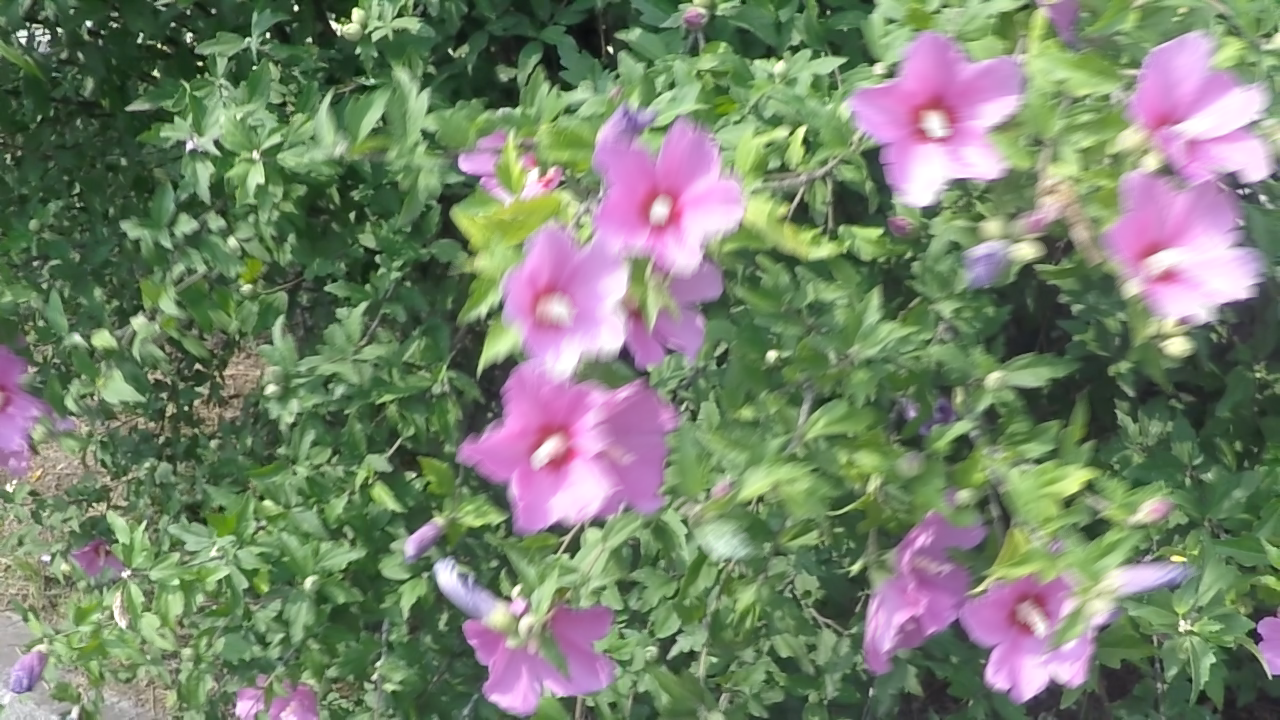

In [52]:
img_blur

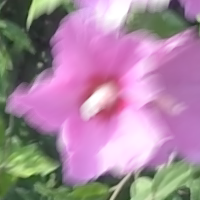

In [85]:
img_blur2 = img_blur.crop((450, 350, 650, 550))  #col, row, col, row index
img_blur2

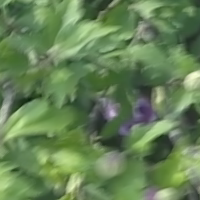

In [99]:
img_blur3 = img_blur.crop((800, 300, 1000, 500))  #col, row, col, row index
img_blur3

In [53]:
yhat = model(255* x).detach().numpy()
print(yhat.shape)

(3, 720, 1280)


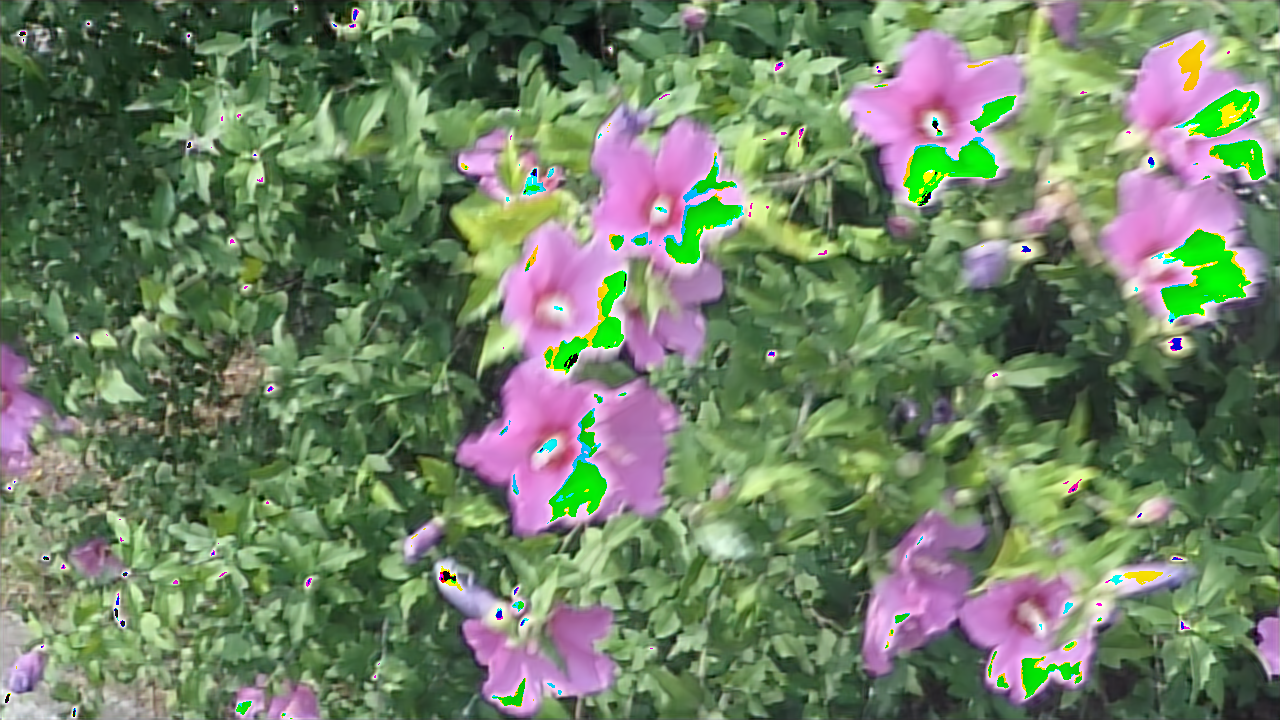

In [95]:
#prediction
yhat2 = yhat.transpose(1, 2, 0)
img = Image.fromarray(yhat2.astype(np.uint8), mode="RGB")
img

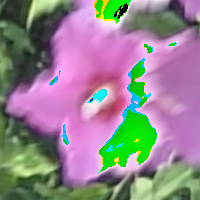

In [98]:
img2 = img.crop((450, 350, 650, 550))  #col, row, col, row index
img2

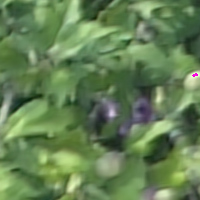

In [100]:
img3 = img.crop((800, 300, 1000, 500))  #col, row, col, row index
img3

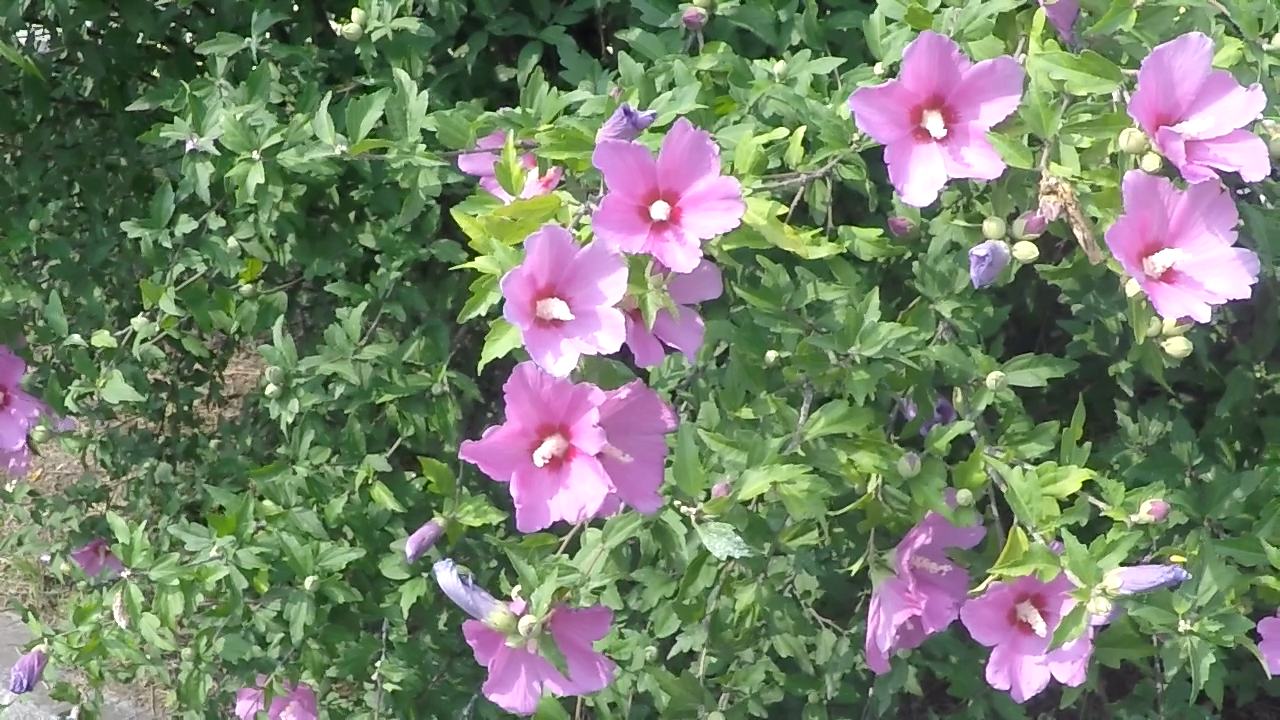

In [55]:
#sharp image
sharp_img = Image.open(sharp)
sharp_img

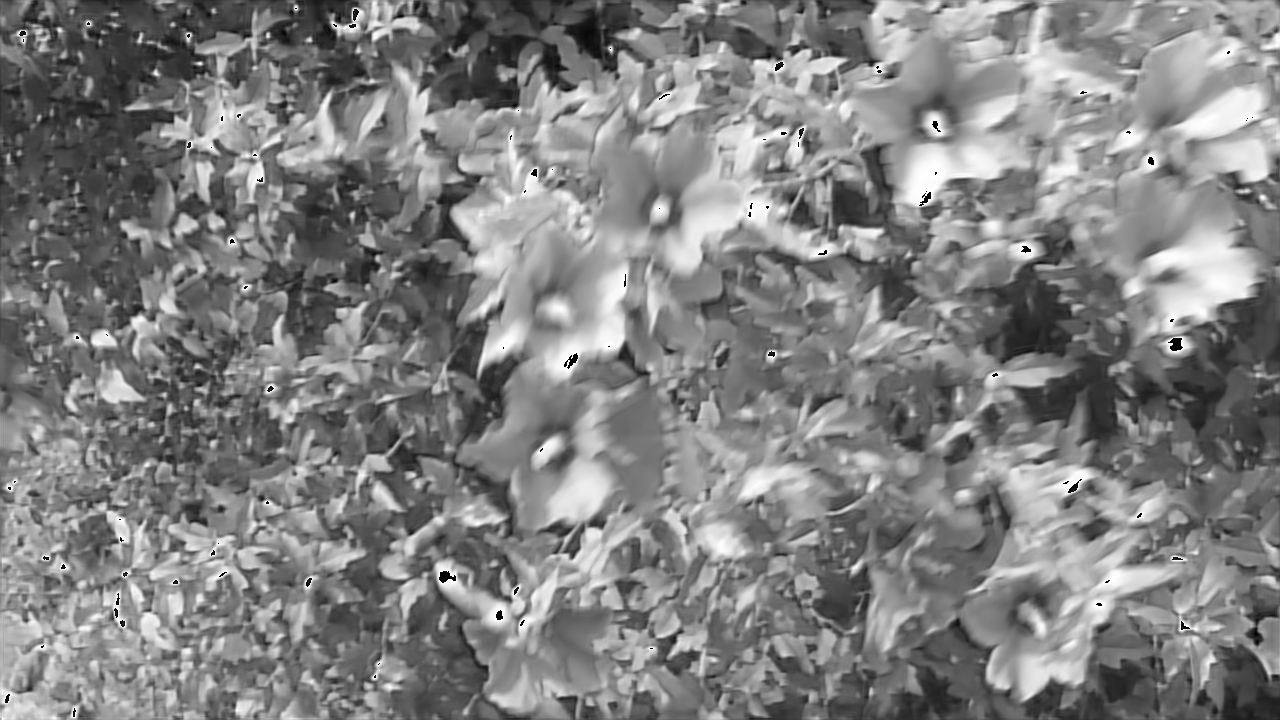

In [58]:
img = Image.fromarray(yhat2[:, :, 1].reshape(720, 1280).astype(np.uint8))
img

# Convert an image into a tensor

In [ ]:
path = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train/GOPR0372_07_00/sharp/000047.png"
img = Image.open(path)
img  #view image

In [4]:
convertor = transforms.ToTensor()
img_tensor = convertor(img)
print(img_tensor.shape)

torch.Size([3, 720, 1280])


In [5]:
img_tensor[0, :5, :5]

tensor([[0.4745, 0.4667, 0.4431, 0.4275, 0.4196],
        [0.4745, 0.4667, 0.4510, 0.4392, 0.4235],
        [0.4667, 0.4549, 0.4667, 0.4627, 0.4471],
        [0.4706, 0.4824, 0.4706, 0.4627, 0.4667],
        [0.4275, 0.4706, 0.4745, 0.4667, 0.4706]])

# Sequence to images

In [23]:
# in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train"
# out_folder = "/Users/liu5/Documents/10-617HW/project/data/train"
in_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/GOPRO_Large/train"
out_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/train"

# sub = "blur_gamma"  #X
sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    names = file.split(os.sep)
    basename = names[-3] + "_" + os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    # print(destination)
    shutil.copy(file, destination)

Total: 2103


In [25]:
# in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train"
# out_folder = "/Users/liu5/Documents/10-617HW/project/data/train"
in_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/GOPRO_Large/test"
out_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/test"

# sub = "blur_gamma"  #X
sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    names = file.split(os.sep)
    basename = names[-3] + "_" + os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    # print(destination)
    shutil.copy(file, destination)

Total: 1111
